# Runge-Kutta Fourth Order Method (RK4)

## Introduction

The **Runge-Kutta Fourth Order method** (RK4) is one of the most widely used numerical techniques for solving ordinary differential equations (ODEs). It provides an excellent balance between computational efficiency and accuracy, achieving fourth-order accuracy while requiring only four function evaluations per step.

## Mathematical Foundation

### The Initial Value Problem

Consider the first-order ODE initial value problem:

$$\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0$$

where $f(t, y)$ is a known function, $t_0$ is the initial time, and $y_0$ is the initial condition.

### Derivation of RK4

The RK4 method approximates the solution by computing a weighted average of four slope estimates at different points within each time step $h$.

Given the current state $(t_n, y_n)$, the next value $y_{n+1}$ is computed as:

$$y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

where the four slopes are:

$$k_1 = f(t_n, y_n)$$

$$k_2 = f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right)$$

$$k_3 = f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2\right)$$

$$k_4 = f(t_n + h, y_n + hk_3)$$

### Error Analysis

The local truncation error (LTE) of RK4 is:

$$\text{LTE} = O(h^5)$$

The global error accumulates over $N = (t_{\text{final}} - t_0)/h$ steps, yielding:

$$\text{Global Error} = O(h^4)$$

This fourth-order accuracy means that halving the step size reduces the error by a factor of approximately 16.

### Geometric Interpretation

- $k_1$: Slope at the beginning of the interval
- $k_2$: Slope at the midpoint using $k_1$ to estimate $y$
- $k_3$: Slope at the midpoint using $k_2$ to estimate $y$
- $k_4$: Slope at the end of the interval using $k_3$ to estimate $y$

The weighted average $(k_1 + 2k_2 + 2k_3 + k_4)/6$ follows Simpson's rule for numerical integration.

## Implementation

We will implement the RK4 method and demonstrate it on several classical problems:

1. **Simple exponential decay**: $\frac{dy}{dt} = -\lambda y$
2. **Harmonic oscillator**: Converting second-order ODE to a system of first-order ODEs
3. **Comparison with exact solutions** to verify accuracy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['lines.linewidth'] = 2

In [2]:
def rk4_step(f, t, y, h):
    """
    Perform a single RK4 step.
    
    Parameters:
    -----------
    f : callable
        The derivative function f(t, y)
    t : float
        Current time
    y : ndarray
        Current state vector
    h : float
        Step size
    
    Returns:
    --------
    y_next : ndarray
        State vector at t + h
    """
    k1 = f(t, y)
    k2 = f(t + h/2, y + h/2 * k1)
    k3 = f(t + h/2, y + h/2 * k2)
    k4 = f(t + h, y + h * k3)
    
    return y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)


def rk4_solve(f, t_span, y0, h):
    """
    Solve an ODE using the RK4 method.
    
    Parameters:
    -----------
    f : callable
        The derivative function f(t, y)
    t_span : tuple
        (t_start, t_end)
    y0 : ndarray
        Initial conditions
    h : float
        Step size
    
    Returns:
    --------
    t : ndarray
        Time points
    y : ndarray
        Solution at each time point
    """
    t_start, t_end = t_span
    n_steps = int((t_end - t_start) / h)
    
    t = np.linspace(t_start, t_end, n_steps + 1)
    y = np.zeros((n_steps + 1, len(y0)))
    y[0] = y0
    
    for i in range(n_steps):
        y[i+1] = rk4_step(f, t[i], y[i], h)
    
    return t, y

## Example 1: Exponential Decay

Consider radioactive decay described by:

$$\frac{dy}{dt} = -\lambda y$$

with analytical solution:

$$y(t) = y_0 e^{-\lambda t}$$

In [3]:
# Exponential decay problem
lambda_decay = 0.5

def f_decay(t, y):
    return -lambda_decay * y

# Solve with RK4
t_span = (0, 10)
y0 = np.array([1.0])
h = 0.5

t_rk4, y_rk4 = rk4_solve(f_decay, t_span, y0, h)

# Analytical solution
t_exact = np.linspace(0, 10, 200)
y_exact = y0[0] * np.exp(-lambda_decay * t_exact)

# Calculate error
y_exact_at_rk4 = y0[0] * np.exp(-lambda_decay * t_rk4)
error = np.abs(y_rk4[:, 0] - y_exact_at_rk4)

print(f"Maximum absolute error: {np.max(error):.2e}")
print(f"Final value (RK4): {y_rk4[-1, 0]:.6f}")
print(f"Final value (Exact): {y_exact_at_rk4[-1]:.6f}")

Maximum absolute error: 1.48e-05
Final value (RK4): 0.006739
Final value (Exact): 0.006738


## Example 2: Simple Harmonic Oscillator

The undamped harmonic oscillator is described by:

$$\frac{d^2x}{dt^2} + \omega^2 x = 0$$

Converting to a system of first-order equations with $y_1 = x$ and $y_2 = \frac{dx}{dt}$:

$$\frac{dy_1}{dt} = y_2$$

$$\frac{dy_2}{dt} = -\omega^2 y_1$$

The analytical solution for initial conditions $x(0) = x_0$, $\dot{x}(0) = 0$ is:

$$x(t) = x_0 \cos(\omega t)$$

In [4]:
# Harmonic oscillator
omega = 2.0 * np.pi  # Angular frequency

def f_oscillator(t, y):
    dydt = np.zeros(2)
    dydt[0] = y[1]           # dx/dt = v
    dydt[1] = -omega**2 * y[0]  # dv/dt = -omega^2 * x
    return dydt

# Initial conditions: x(0) = 1, v(0) = 0
y0_osc = np.array([1.0, 0.0])
t_span_osc = (0, 5)
h_osc = 0.01

t_osc, y_osc = rk4_solve(f_oscillator, t_span_osc, y0_osc, h_osc)

# Analytical solution
x_exact_osc = y0_osc[0] * np.cos(omega * t_osc)
v_exact_osc = -y0_osc[0] * omega * np.sin(omega * t_osc)

# Calculate errors
error_x = np.abs(y_osc[:, 0] - x_exact_osc)
error_v = np.abs(y_osc[:, 1] - v_exact_osc)

print(f"Position max error: {np.max(error_x):.2e}")
print(f"Velocity max error: {np.max(error_v):.2e}")

Position max error: 3.88e-06
Velocity max error: 2.56e-05


## Example 3: Convergence Analysis

We verify the fourth-order convergence by solving with different step sizes and measuring the error. For a fourth-order method, we expect:

$$\text{Error} \propto h^4$$

On a log-log plot, this should appear as a line with slope 4.

In [5]:
# Convergence study
h_values = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625]
errors = []

for h in h_values:
    t, y = rk4_solve(f_decay, t_span, y0, h)
    y_exact_final = y0[0] * np.exp(-lambda_decay * t[-1])
    errors.append(np.abs(y[-1, 0] - y_exact_final))

h_values = np.array(h_values)
errors = np.array(errors)

# Calculate convergence rate
log_h = np.log10(h_values)
log_e = np.log10(errors)
slope, intercept = np.polyfit(log_h, log_e, 1)

print(f"Convergence rate (slope): {slope:.2f}")
print("Expected for RK4: 4.00")

Convergence rate (slope): 4.05
Expected for RK4: 4.00


## Visualization

Let's create a comprehensive visualization showing:
1. Exponential decay solution and error
2. Harmonic oscillator phase portrait
3. Convergence analysis
4. Energy conservation in the oscillator

/tmp/ipykernel_161216/1266178143.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


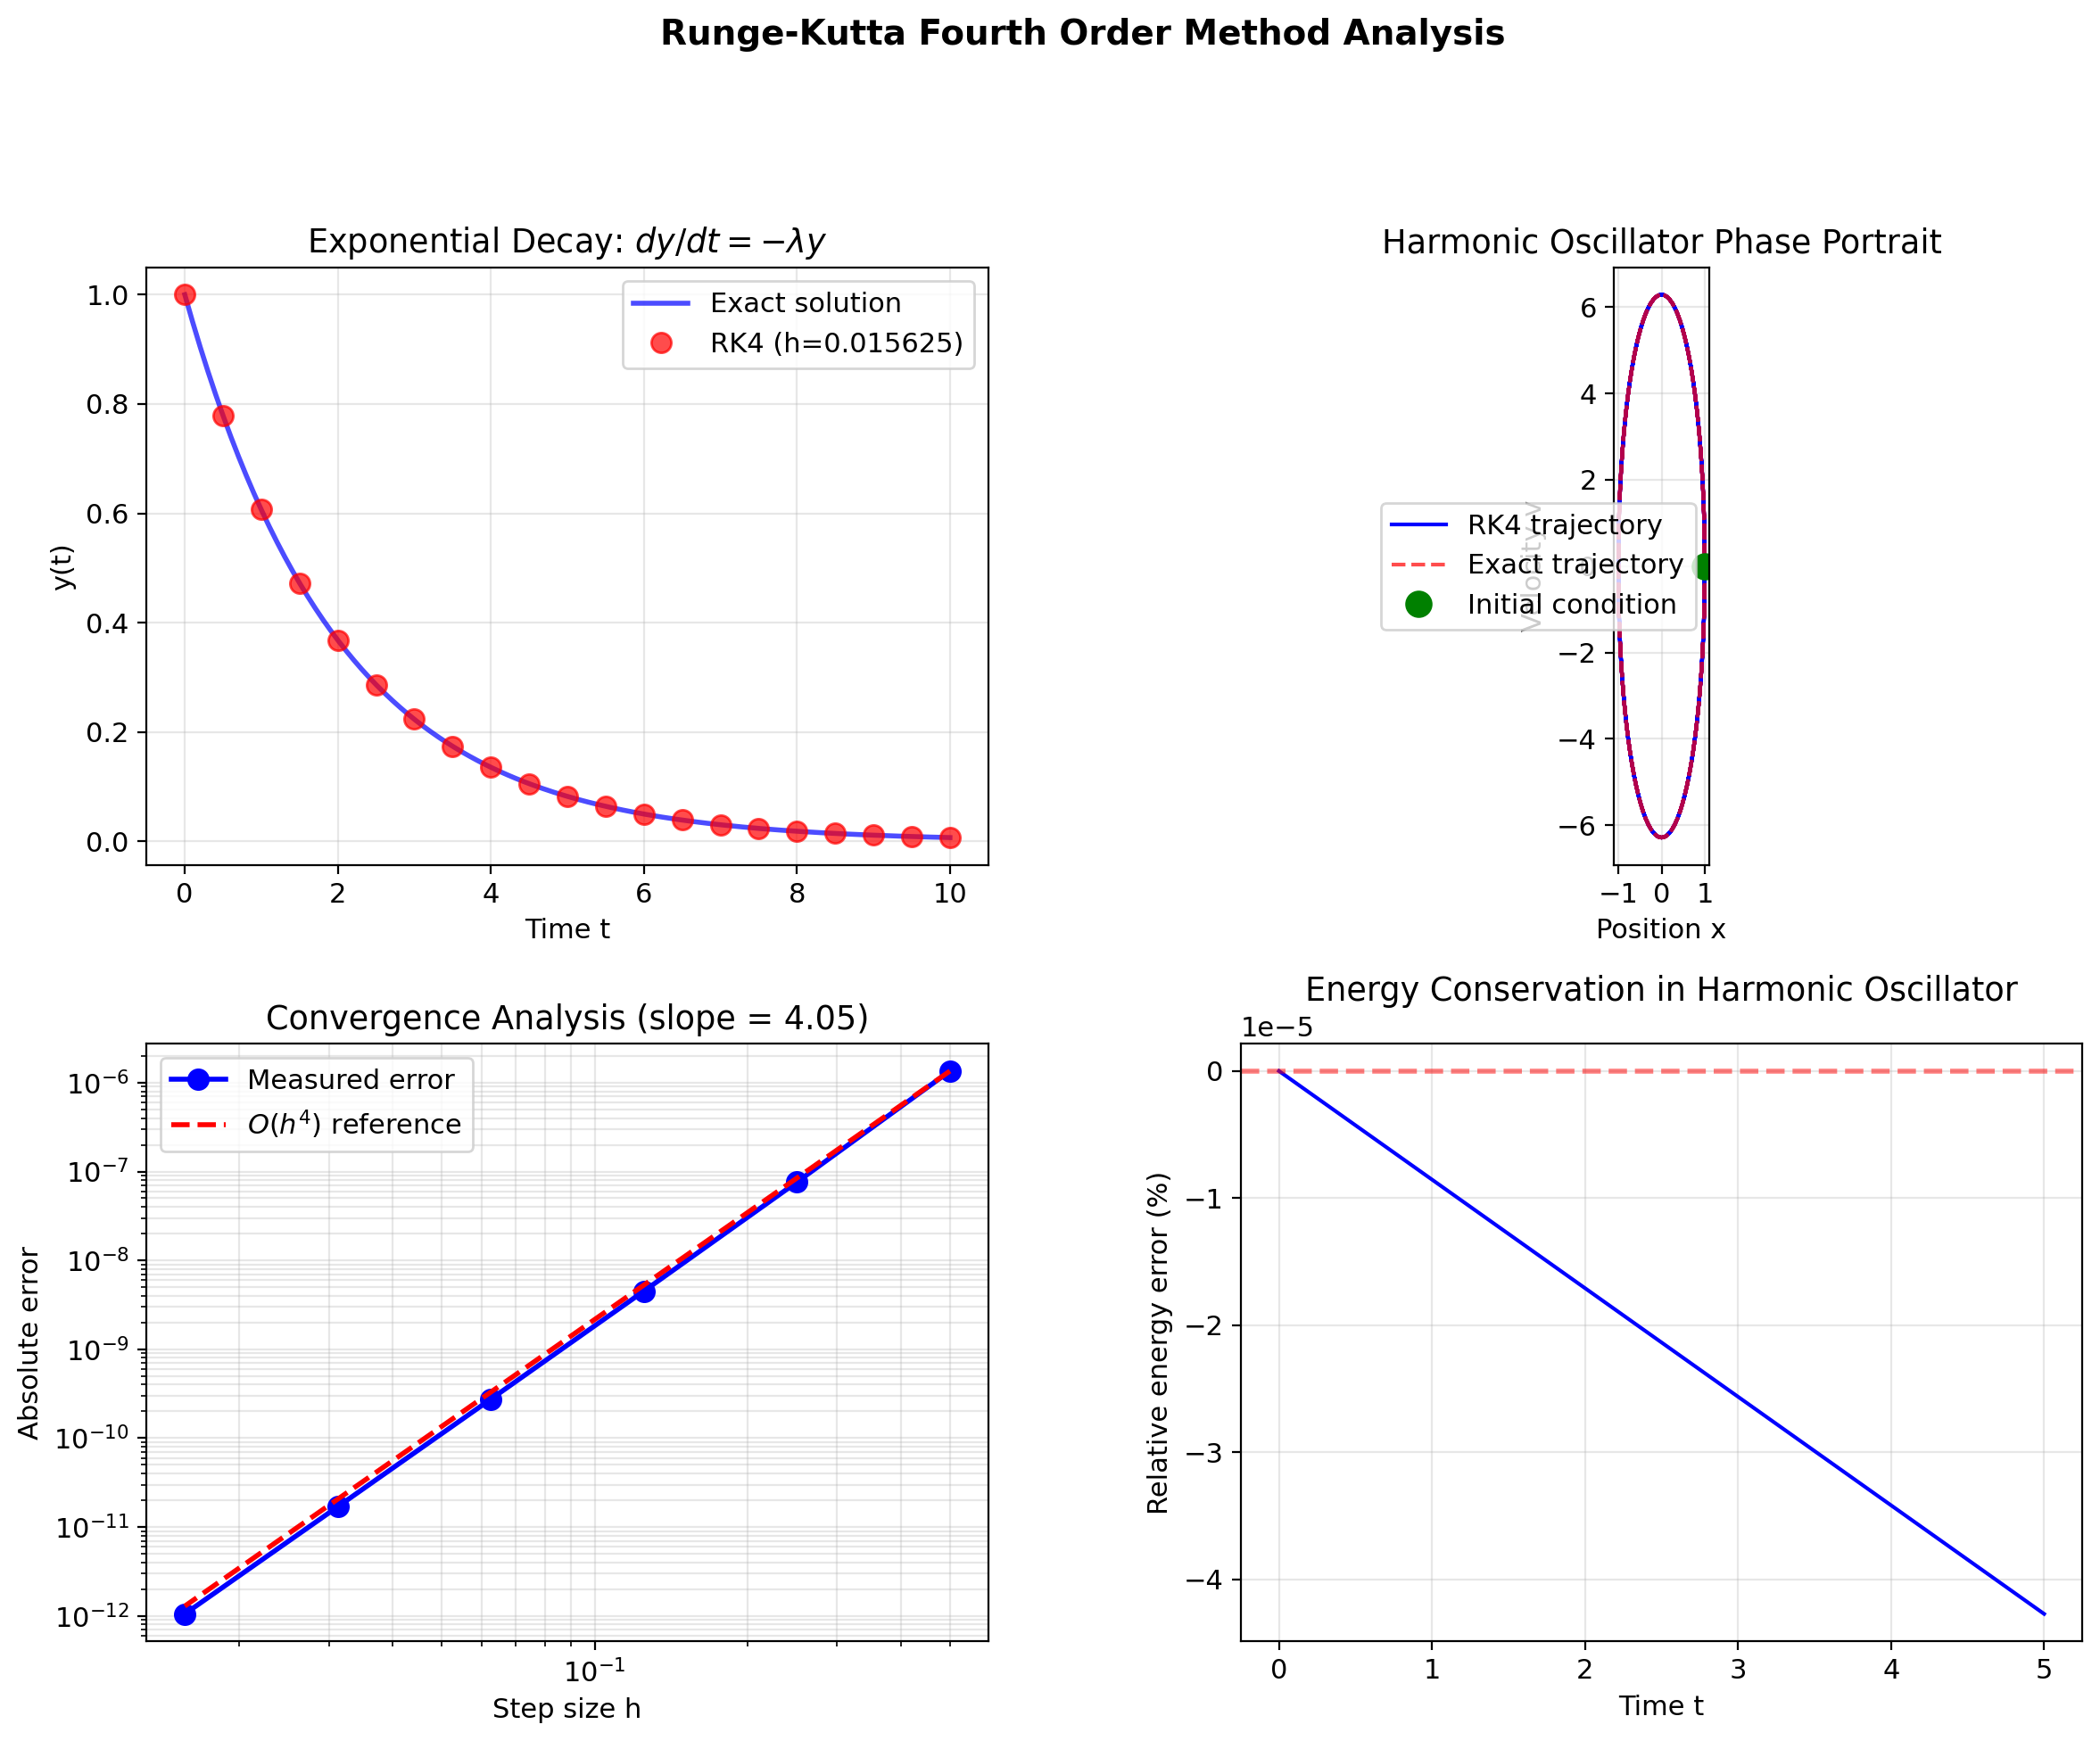


Figure saved to 'plot.png'


In [6]:
# Create comprehensive figure
fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.3)

# Plot 1: Exponential Decay
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(t_exact, y_exact, 'b-', label='Exact solution', alpha=0.7)
ax1.plot(t_rk4, y_rk4[:, 0], 'ro', markersize=8, label=f'RK4 (h={h})', alpha=0.7)
ax1.set_xlabel('Time t')
ax1.set_ylabel('y(t)')
ax1.set_title('Exponential Decay: $dy/dt = -\\lambda y$')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Harmonic Oscillator Phase Portrait
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(y_osc[:, 0], y_osc[:, 1], 'b-', label='RK4 trajectory', linewidth=1.5)
ax2.plot(x_exact_osc, v_exact_osc, 'r--', label='Exact trajectory', alpha=0.7, linewidth=1.5)
ax2.plot(y0_osc[0], y0_osc[1], 'go', markersize=10, label='Initial condition')
ax2.set_xlabel('Position x')
ax2.set_ylabel('Velocity v')
ax2.set_title('Harmonic Oscillator Phase Portrait')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal', adjustable='box')

# Plot 3: Convergence Analysis
ax3 = fig.add_subplot(gs[1, 0])
ax3.loglog(h_values, errors, 'bo-', markersize=8, label='Measured error')
# Reference line with slope 4
h_ref = np.array([h_values[0], h_values[-1]])
e_ref = errors[0] * (h_ref / h_values[0])**4
ax3.loglog(h_ref, e_ref, 'r--', label=f'$O(h^4)$ reference')
ax3.set_xlabel('Step size h')
ax3.set_ylabel('Absolute error')
ax3.set_title(f'Convergence Analysis (slope = {slope:.2f})')
ax3.legend()
ax3.grid(True, alpha=0.3, which='both')

# Plot 4: Energy Conservation
ax4 = fig.add_subplot(gs[1, 1])
# Total energy: E = (1/2)v^2 + (1/2)omega^2*x^2
energy_rk4 = 0.5 * y_osc[:, 1]**2 + 0.5 * omega**2 * y_osc[:, 0]**2
energy_exact = 0.5 * omega**2 * y0_osc[0]**2  # Constant
relative_energy_error = (energy_rk4 - energy_exact) / energy_exact

ax4.plot(t_osc, relative_energy_error * 100, 'b-', linewidth=1.5)
ax4.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax4.set_xlabel('Time t')
ax4.set_ylabel('Relative energy error (%)')
ax4.set_title('Energy Conservation in Harmonic Oscillator')
ax4.grid(True, alpha=0.3)

plt.suptitle('Runge-Kutta Fourth Order Method Analysis', fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('runge_kutta_fourth_order_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Summary

The Runge-Kutta Fourth Order method provides:

1. **Fourth-order accuracy**: Error decreases as $O(h^4)$ with step size
2. **Good stability**: Suitable for a wide range of problems
3. **Efficiency**: Only 4 function evaluations per step
4. **Versatility**: Easily handles systems of ODEs

### Key Takeaways

- RK4 is often the default choice for ODE integration due to its excellent accuracy-to-cost ratio
- For stiff equations or long-time integrations, adaptive step size or specialized methods may be needed
- Phase portraits and energy conservation are valuable tools for validating numerical solutions

### Extensions

- **Adaptive step size**: Runge-Kutta-Fehlberg (RK45) uses embedded error estimation
- **Higher-order methods**: RK5, RK8 for increased accuracy
- **Symplectic integrators**: Better energy conservation for Hamiltonian systems